<a href="https://colab.research.google.com/github/makramjenayah/Collabtive/blob/master/project_management_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Sample dataset structure

The follow is a example of how the dataset rows might look like. Once the format is fixed, a script should be implemented to use generate more entries with the same format.

In [ ]:


dataset = [
  {"project_id": "Migration Mysql 1",
   "project": "MySql database cross-datacenter migration",
   "project_budget": "9000",
   "project_delivery_status":"in progress",
   "tasks": [
      {"task_id":"1", "step_description": "Define high level architecture", "workload_in_days": 10,"start_date": "05/05/2019", "estimated_end_date": "20/05/2019", "completion":"100%","priority":"500", "Predecessors":""},
      {"task_id":"2", "step_description": "Define low level architecture", "workload_in_days": 4,"start_date": "21/05/2019", "estimated_end_date": "27/05/2019", "completion":"100%","priority":"500", "Predecessors":"1"},
      {"task_id":"3", "step_description": "Security validation of architecture", "workload_in_days": 1,"start_date": "28/05/2019", "estimated_end_date": "29/05/2019", "completion":"100%","priority":"400", "Predecessors":"2"},
      {"task_id":"4", "step_description": "Provision new servers in the target datacenter", "workload_in_days": 2,"start_date": "30/05/2019", "estimated_end_date": "03/06/2019", "completion":"100%","priority":"500", "Predecessors":"3"},
      {"task_id":"5", "step_description": "Setup user access permissions and authorizations", "workload_in_days": 5,"start_date": "04/06/2019", "estimated_end_date": "12/06/2019", "completion":"100%","priority":"300", "Predecessors":"4"},
      {"task_id":"6", "step_description": "Create VPN", "workload_in_days": 4,"start_date": "13/06/2019", "estimated_end_date": "19/06/2019", "completion":"70%","priority":"400", "Predecessors":"5"},
      {"task_id":"7", "step_description": "Export data from source MySql database", "workload_in_days": 1,"start_date": "20/06/2019", "estimated_end_date": "21/06/2019", "completion":"30%","priority":"300", "Predecessors":"6"},
      {"task_id":"8", "step_description": "Upload data to destination MySql Server", "workload_in_days": 2,"start_date": "22/06/2019", "estimated_end_date": "25/06/2019", "completion":"0%","priority":"500", "Predecessors":"7"},
      {"task_id":"9", "step_description": "Project closure", "workload_in_days": 1,"start_date": "26/06/2019", "estimated_end_date": "26/06/2019", "completion":"0%","priority":"500", "Predecessors":"8"}
   ],
   "team":[
      {"team_member_id":"1", "team_member":"Mohamed Ali", "specialty":"data science", "level": "Expert", "daily_cost":"1000", "availability":"4"},        
      {"team_member_id":"2","team_member":"Makram", "specialty":"architecture", "level": "advanced", "daily_cost":"800", "availability":"5"},
      {"team_member_id":"3","team_member":"jean", "specialty":"architecture", "level": "beginner", "daily_cost":"200", "availability":"10"},
      {"team_member_id":"4","team_member":"Ahmed", "specialty":"database", "level": "advanced", "daily_cost":"300", "availability":"8"},            
      {"team_member_id":"5","team_member":"Paul", "specialty":"Cloud", "level": "advanced", "daily_cost":"200", "availability":"3"},            
      {"team_member_id":"6","team_member":"Jeremy", "specialty":"Project Manager", "level": "beginner", "daily_cost":"100", "availability":"10"},            
      {"team_member_id":"7","team_member":"thomas", "specialty":"IT Security", "level": "beginner", "daily_cost":"100", "availability":"1"}            
   ],
   "problems":[
       {"problem_id":"1", "task_id":"1", "problem_type":"quality", "problem_description":"Lack of expertise in high level architecture", "assigned_team_member":"3"},
       {"problem_id":"2", "task_id":"2", "problem_type":"delay", "problem_description":"re-writing a poorly written high level design document", "assigned_team_member":"2"},
       {"problem_id":"3", "task_id":"3", "problem_type":"delay", "problem_description":"Security Spoc is not available", "assigned_team_member":"7"},
       {"problem_id":"4", "task_id":"3", "problem_type":"security_issue", "problem_description":"Security protocol to be updated in low level design", "assigned_team_member":"7"},
       {"problem_id":"5", "task_id":"4", "problem_type":"delay", "problem_description":"infrastructure requirements weren't met", "assigned_team_member":"5"},
       {"problem_id":"6", "task_id":"9", "problem_type":"budget", "problem_description":"unable to meet target budget", "assigned_team_member":"6"}  
   ]},
  {"project_id": "Migration Oracle 2",
  "project": "Oracle database cross-datacenter migration",
  "project_budget": "25000",
  "project_delivery_status":"success",
  "tasks": [
    {"task_id":"1", "step_description": "Define high level architecture", "workload_in_days": 10,"start_date": "05/05/2018", "estimated_end_date": "20/05/2018", "completion":"100%","priority":"500", "Predecessors":""},
    {"task_id":"2", "step_description": "Define low level architecture", "workload_in_days": 4,"start_date": "21/05/2018", "estimated_end_date": "27/05/2018", "completion":"100%","priority":"500", "Predecessors":"1"},
    {"task_id":"3", "step_description": "Security validation of architecture", "workload_in_days": 1,"start_date": "28/05/2018", "estimated_end_date": "29/05/2018", "completion":"100%","priority":"400", "Predecessors":"2"},
    {"task_id":"4", "step_description": "Provision new servers in the target datacenter", "workload_in_days": 2,"start_date": "30/05/2018", "estimated_end_date": "03/06/2018", "completion":"100%","priority":"500", "Predecessors":"3"},
    {"task_id":"6", "step_description": "Create VPN", "workload_in_days": 4,"start_date": "13/06/2018", "estimated_end_date": "18/06/2018", "completion":"70%","priority":"400", "Predecessors":"3"},
    {"task_id":"5", "step_description": "Setup user access permissions and authorizations", "workload_in_days": 5,"start_date": "04/06/2018", "estimated_end_date": "12/06/2018", "completion":"100%","priority":"300", "Predecessors":"5"},
    {"task_id":"7", "step_description": "Setup Oracle instance on new server", "workload_in_days": 1,"start_date": "20/06/2018", "estimated_end_date": "21/06/2018", "completion":"30%","priority":"300", "Predecessors":"6"},
    {"task_id":"7", "step_description": "Export data from source Oracle database", "workload_in_days": 1,"start_date": "20/06/2018", "estimated_end_date": "21/06/2018", "completion":"30%","priority":"300", "Predecessors":"7"},
    {"task_id":"8", "step_description": "Upload data to destination Oracle Server", "workload_in_days": 2,"start_date": "22/06/2018", "estimated_end_date": "25/06/2018", "completion":"0%","priority":"500", "Predecessors":"8"},
    {"task_id":"9", "step_description": "Project closure", "workload_in_days": 1,"start_date": "26/06/2018", "estimated_end_date": "26/06/2018", "completion":"100%","priority":"500", "Predecessors":"9"}
  ],
  "team":[
    {"team_member_id":"1", "team_member":"Nassim", "specialty":"data science", "level": "Expert", "daily_cost":"1000", "availability":"4"},        
    {"team_member_id":"2","team_member":"Ikram", "specialty":"architecture", "level": "advanced", "daily_cost":"800", "availability":"5"},
    {"team_member_id":"3","team_member":"Jhon", "specialty":"architecture", "level": "beginner", "daily_cost":"200", "availability":"10"},
    {"team_member_id":"4","team_member":"Ahmed", "specialty":"Oracle expert", "level": "advanced", "daily_cost":"300", "availability":"8"},            
    {"team_member_id":"5","team_member":"Paul", "specialty":"Cloud", "level": "advanced", "daily_cost":"200", "availability":"3"},            
    {"team_member_id":"6","team_member":"Jeremy", "specialty":"Project Manager", "level": "beginner", "daily_cost":"100", "availability":"10"},            
    {"team_member_id":"7","team_member":"thomas", "specialty":"IT Security", "level": "beginner", "daily_cost":"100", "availability":"1"}            
],
"problems":[
    {"problem_id":"1", "task_id":"1", "problem_type":"quality", "problem_description":"Lack of expertise in high level architecture", "assigned_team_member":"3"},
    {"problem_id":"2", "task_id":"2", "problem_type":"delay", "problem_description":"re-writing a poorly written high level design document", "assigned_team_member":"2"},
    {"problem_id":"3", "task_id":"3", "problem_type":"delay", "problem_description":"Security Spoc is not available", "assigned_team_member":"7"},
    {"problem_id":"4", "task_id":"9", "problem_type":"budget", "problem_description":"unable to meet target budget", "assigned_team_member":"6"},
    {"problem_id":"5", "task_id":"7", "problem_type":"Licence", "problem_description":"unable to get correct licence ", "assigned_team_member":"10"}
]},
{"project_id": "Move to cloud 3",
    "project": "Move to cloud project",
    "project_budget": "30000",
 "project_delivery_status":"in progress",
    "tasks": [
        {"task_id":"1", "step_description": "Select cloud provider", "workload_in_days": 10,"start_date": "05/05/2020", "estimated_end_date": "20/05/2020", "completion":"100%","priority":"500", "Predecessors":""},
        {"task_id":"2", "step_description": "Define high level architecture", "workload_in_days": 10,"start_date": "05/05/2020", "estimated_end_date": "20/05/2020", "completion":"100%","priority":"500", "Predecessors":""},
        {"task_id":"3", "step_description": "Define low level architecture", "workload_in_days": 4,"start_date": "21/05/2020", "estimated_end_date": "27/05/2020", "completion":"100%","priority":"500", "Predecessors":"1"},
        {"task_id":"4", "step_description": "Security validation of architecture", "workload_in_days": 1,"start_date": "28/05/2020", "estimated_end_date": "29/05/2020", "completion":"100%","priority":"400", "Predecessors":"2"},
        {"task_id":"5", "step_description": "Provision new servers in the target datacenter", "workload_in_days": 2,"start_date": "30/05/2020", "estimated_end_date": "03/06/2020", "completion":"100%","priority":"500", "Predecessors":"3"},
        {"task_id":"6", "step_description": "Create VPN", "workload_in_days": 4,"start_date": "13/06/2020", "estimated_end_date": "20/06/2020", "completion":"70%","priority":"400", "Predecessors":"3"},
        {"task_id":"7", "step_description": "Setup user access permissions and authorizations", "workload_in_days": 5,"start_date": "04/06/2020", "estimated_end_date": "12/06/2020", "completion":"100%","priority":"300", "Predecessors":"5"},
        {"task_id":"8", "step_description": "Setup Oracle instance on new server", "workload_in_days": 1,"start_date": "20/06/2020", "estimated_end_date": "21/06/2020", "completion":"30%","priority":"300", "Predecessors":"6"},
        {"task_id":"9", "step_description": "Export data from source Oracle database", "workload_in_days": 1,"start_date": "20/06/2020", "estimated_end_date": "21/06/2020", "completion":"30%","priority":"300", "Predecessors":"7"},
        {"task_id":"10", "step_description": "Upload data to destination Oracle Server", "workload_in_days": 2,"start_date": "22/06/2020", "estimated_end_date": "25/06/2020", "completion":"0%","priority":"500", "Predecessors":"8"},
        {"task_id":"11", "step_description": "Project closure", "workload_in_days": 1,"start_date": "26/06/2020", "estimated_end_date": "26/06/2020", "completion":"0%","priority":"500", "Predecessors":"9"}
        
    ],
    "team":[
        {"team_member_id":"1", "team_member":"Nassim", "specialty":"data science", "level": "Expert", "daily_cost":"1000", "availability":"4"},        
        {"team_member_id":"2","team_member":"Ikram", "specialty":"architecture", "level": "advanced", "daily_cost":"800", "availability":"5"},
        {"team_member_id":"3","team_member":"Jhon", "specialty":"architecture", "level": "beginner", "daily_cost":"200", "availability":"10"},
        {"team_member_id":"4","team_member":"Ahmed", "specialty":"Oracle expert", "level": "advanced", "daily_cost":"300", "availability":"8"},            
        {"team_member_id":"5","team_member":"Paul", "specialty":"Cloud", "level": "advanced", "daily_cost":"200", "availability":"3"},            
        {"team_member_id":"6","team_member":"Jeremy", "specialty":"Project Manager", "level": "beginner", "daily_cost":"100", "availability":"10"},            
        {"team_member_id":"7","team_member":"thomas", "specialty":"IT Security", "level": "beginner", "daily_cost":"100", "availability":"1"}            
    ],
    "problems":[
        {"problem_id":"1", "task_id":"1", "problem_type":"quality", "problem_description":"Lack of expertise in high level architecture", "assigned_team_member":"3"},
        {"problem_id":"2", "task_id":"2", "problem_type":"delay", "problem_description":"re-writing a poorly written high level design document", "assigned_team_member":"2"},
        {"problem_id":"3", "task_id":"3", "problem_type":"delay", "problem_description":"Security Spoc is not available", "assigned_team_member":"7"},
        {"problem_id":"4", "task_id":"3", "problem_type":"security_issue", "problem_description":"Security protocol to be updated in low level design", "assigned_team_member":"7"},
        {"problem_id":"5", "task_id":"4", "problem_type":"delay", "problem_description":"infrastructure requirements weren't met", "assigned_team_member":"5"},
        {"problem_id":"6", "task_id":"9", "problem_type":"budget", "problem_description":"unable to meet target budget", "assigned_team_member":"6"},
        {"problem_id":"6", "task_id":"9", "problem_type":"Licence", "problem_description":"unable to get correct licence ", "assigned_team_member":"6"}  
    ]},
   {"project_id": "Archivage 4",
    "project": "data archiving project",
    "project_budget": "3000",
    "project_delivery_status":"failure",
    "tasks": [
       {"task_id":"1", "step_description": "storage infrastructure assessment", "workload_in_days": 10,"start_date": "05/05/2020", "estimated_end_date": "20/05/2020", "completion":"100%","priority":"500", "Predecessors":""},
       {"task_id":"2", "step_description": "Define data migration strategy", "workload_in_days": 10,"start_date": "05/05/2020", "estimated_end_date": "20/05/2020", "completion":"100%","priority":"500", "Predecessors":"1"},
       {"task_id":"3", "step_description": "execute the migration", "workload_in_days": 4,"start_date": "21/05/2020", "estimated_end_date": "27/05/2020", "completion":"50%","priority":"500", "Predecessors":"2"}
    ],
    "team":[
       {"team_member_id":"1", "team_member":"Audrey", "specialty":"service delivery", "level": "Expert", "daily_cost":"1000", "availability":"4"},        
       {"team_member_id":"2","team_member":"Stephane", "specialty":"Manager", "level": "advanced", "daily_cost":"800", "availability":"5"},
       {"team_member_id":"3","team_member":"Paul", "specialty":"cloud", "level": "advanced", "daily_cost":"500", "availability":"10"},           
    ],
    "problems":[
        {"problem_id":"1", "task_id":"1", "problem_type":"delay", "problem_description":"unable to connect to assessment tool", "assigned_team_member":"1"},
        {"problem_id":"2", "task_id":"2", "problem_type":"delay", "problem_description":"migration strategy was rejected by security team", "assigned_team_member":"2"},
        {"problem_id":"3", "task_id":"3", "problem_type":"delay", "problem_description":"flow wasn't open by security team", "assigned_team_member":"3"},
    ]}
]

In [ ]:
dataset

[{'problems': [{'assigned_team_member': '3',
    'problem_description': 'Lack of expertise in high level architecture',
    'problem_id': '1',
    'problem_type': 'quality',
    'task_id': '1'},
   {'assigned_team_member': '2',
    'problem_description': 're-writing a poorly written high level design document',
    'problem_id': '2',
    'problem_type': 'delay',
    'task_id': '2'},
   {'assigned_team_member': '7',
    'problem_description': 'Security Spoc is not available',
    'problem_id': '3',
    'problem_type': 'delay',
    'task_id': '3'},
   {'assigned_team_member': '7',
    'problem_description': 'Security protocol to be updated in low level design',
    'problem_id': '4',
    'problem_type': 'security_issue',
    'task_id': '3'},
   {'assigned_team_member': '5',
    'problem_description': "infrastructure requirements weren't met",
    'problem_id': '5',
    'problem_type': 'delay',
    'task_id': '4'},
   {'assigned_team_member': '6',
    'problem_description': 'unable to mee

## Data preprocessing

The first idea of the project is to find similar projects to a new one and use these to try to infer statistics and recommendation of resources, budget allocation and potential problems to consider while executing the new project plan.


To do so, we need to extract all the text fields from the previous dataset and attach them to the project id. 

The following code snippet does that:

In [ ]:
projects_ids_and_descriptions = []
for project in dataset:
  temp = {}
  temp["project_id"] = project["project_id"]
  temp["project_description"] = " ".join([step["step_description"] for step in project["tasks"]])
  projects_ids_and_descriptions.append(temp)

In [ ]:
projects_ids_and_descriptions

[{'project_description': 'Define high level architecture Define low level architecture Security validation of architecture Provision new servers in the target datacenter Setup user access permissions and authorizations Create VPN Export data from source MySql database Upload data to destination MySql Server Project closure',
  'project_id': 'Migration Mysql 1'},
 {'project_description': 'Define high level architecture Define low level architecture Security validation of architecture Provision new servers in the target datacenter Create VPN Setup user access permissions and authorizations Setup Oracle instance on new server Export data from source Oracle database Upload data to destination Oracle Server Project closure',
  'project_id': 'Migration Oracle 2'},
 {'project_description': 'Select cloud provider Define high level architecture Define low level architecture Security validation of architecture Provision new servers in the target datacenter Create VPN Setup user access permission

In [ ]:
data = pd.DataFrame(projects_ids_and_descriptions)

In [ ]:
data.head()

,project_id,project_description
0,Migration Mysql 1,Define high level architecture Define low leve...
1,Migration Oracle 2,Define high level architecture Define low leve...
2,Move to cloud 3,Select cloud provider Define high level archit...
3,Archivage 4,storage infrastructure assessment Define data ...


## Text simiarity with TFIDF



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
project_descriptions = data["project_description"].tolist()

Generate a TFIDF (Term Frequence, Inverse Document Frequency) representation of the projects descriptions, by fitting a `TfidfVectorize`:

In [ ]:
tfidf = TfidfVectorizer()
numerical_project_descriptions = tfidf.fit_transform(project_descriptions)

TFIDF takes all tokens (words) in the dataset and uses them to create a numeric representation for each word. 

Then, for each project descriptions, we replace every token with the correspondent numeric value. 

Eventually we end up with a numeric vector (list of floats) that represents each project.

The following shows how the data looks like:

In [ ]:
pd.DataFrame(numerical_project_descriptions.toarray(),
             columns=tfidf.get_feature_names()).head()

,access,and,architecture,assessment,authorizations,closure,cloud,create,data,database,datacenter,define,destination,execute,export,from,high,in,infrastructure,instance,level,low,migration,mysql,new,of,on,oracle,permissions,project,provider,provision,security,select,server,servers,setup,source,storage,strategy,target,the,to,upload,user,validation,vpn
0,0.131495,0.131495,0.394485,0.000000,0.131495,0.131495,0.000000,0.131495,0.215011,0.131495,0.131495,0.215011,0.131495,0.000000,0.131495,0.131495,0.131495,0.131495,0.000000,0.000000,0.262990,0.131495,0.000000,0.412024,0.131495,0.131495,0.000000,0.000000,0.131495,0.131495,0.000000,0.131495,0.131495,0.000000,0.131495,0.131495,0.131495,0.131495,0.000000,0.000000,0.131495,0.107506,0.131495,0.131495,0.131495,0.131495,0.131495
1,0.116406,0.116406,0.349218,0.000000,0.116406,0.116406,0.000000,0.116406,0.190339,0.116406,0.116406,0.190339,0.116406,0.000000,0.116406,0.116406,0.116406,0.116406,0.000000,0.143785,0.232812,0.116406,0.000000,0.000000,0.232812,0.116406,0.143785,0.431354,0.116406,0.116406,0.000000,0.116406,0.116406,0.000000,0.232812,0.116406,0.232812,0.116406,0.000000,0.000000,0.116406,0.095170,0.116406,0.116406,0.116406,0.116406,0.116406
2,0.111000,0.111000,0.333000,0.000000,0.111000,0.111000,0.173903,0.111000,0.181500,0.111000,0.111000,0.181500,0.111000,0.000000,0.111000,0.111000,0.111000,0.111000,0.000000,0.137107,0.222000,0.111000,0.000000,0.000000,0.222000,0.111000,0.137107,0.411321,0.111000,0.111000,0.173903,0.111000,0.111000,0.173903,0.222000,0.111000,0.222000,0.111000,0.000000,0.000000,0.111000,0.090750,0.111000,0.111000,0.111000,0.111000,0.111000
3,0.000000,0.000000,0.000000,0.319162,0.000000,0.000000,0.000000,0.000000,0.166552,0.000000,0.000000,0.166552,0.000000,0.319162,0.000000,0.000000,0.000000,0.000000,0.319162,0.000000,0.000000,0.000000,0.638325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319162,0.319162,0.000000,0.166552,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pairwise_projects_similarity = numerical_project_descriptions * numerical_project_descriptions.T

In [ ]:
pairwise_projects_similarity

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
def heatmap(x_labels, y_labels, values):
    fig, ax = plt.subplots()
    im = ax.imshow(values)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, "%.2f"%values[i, j],
                           ha="center", va="center", color="w", fontsize=6)
    fig.tight_layout()
    plt.show()

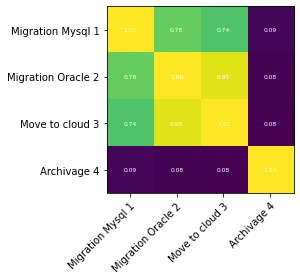

In [ ]:
heatmap(data["project_id"], data["project_id"], pairwise_projects_similarity.toarray())